In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('mobile_phone.csv')

In [7]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

<Axes: >

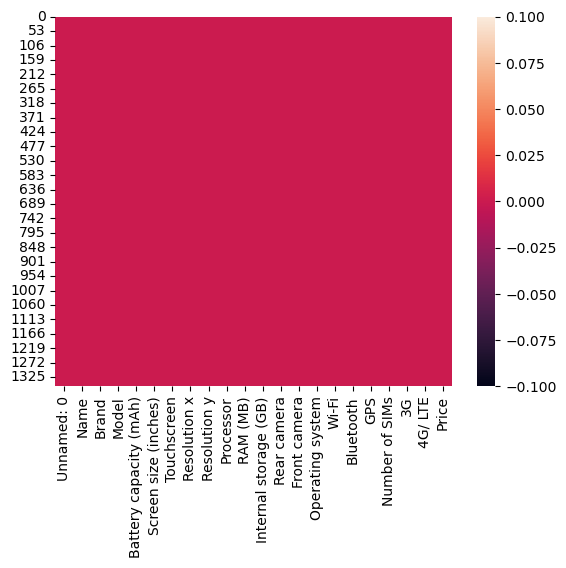

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

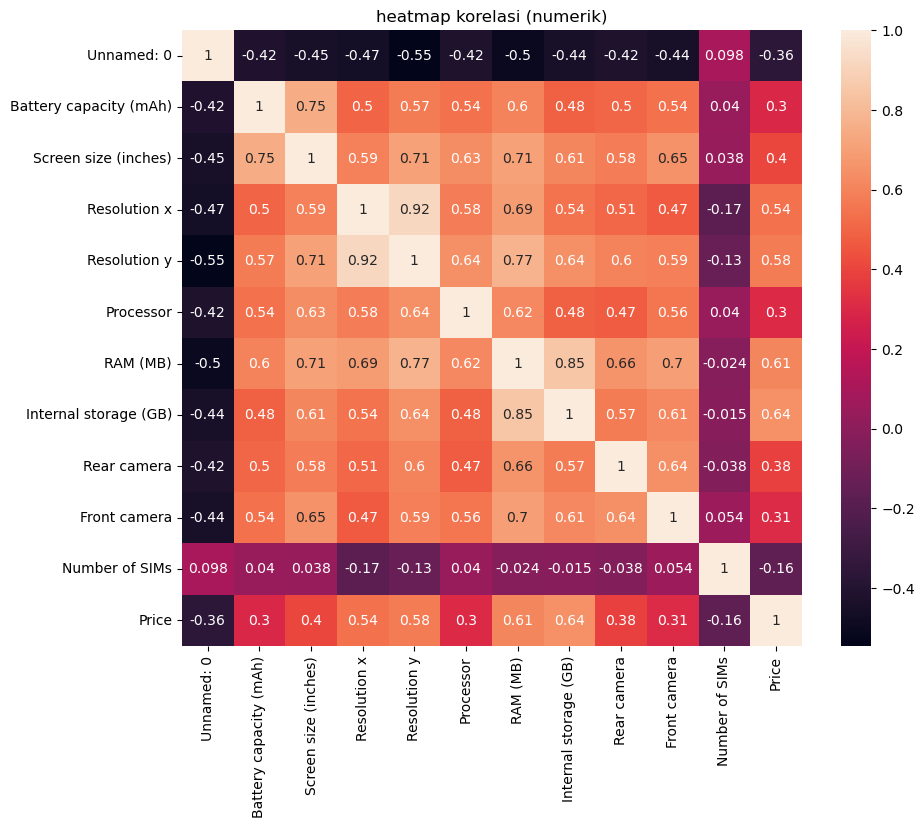

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("heatmap korelasi (numerik)")
plt.show()

In [13]:
models = df.groupby('Model').count()[['Processor']].sort_values(by='Processor',ascending=True).reset_index()
models = models.rename(columns={'Processor' : 'numberOfmobile'})

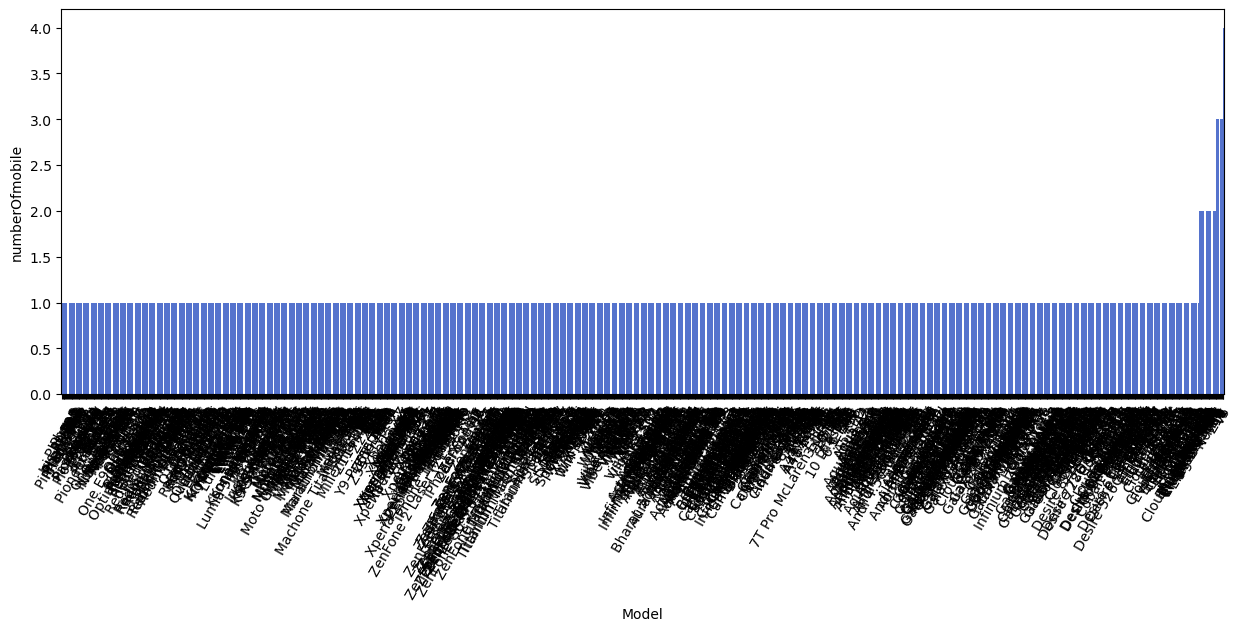

In [14]:
pig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Model'], y=models['numberOfmobile'], color='royalblue')
plt.xticks(rotation=60)
plt.show()

In [15]:
engine = df.groupby('Screen size (inches)').count()[['Processor']].sort_values(by='Processor',ascending=True).reset_index()
engine = engine.rename(columns={'Processor' : 'count'})

<Axes: xlabel='Screen size (inches)', ylabel='count'>

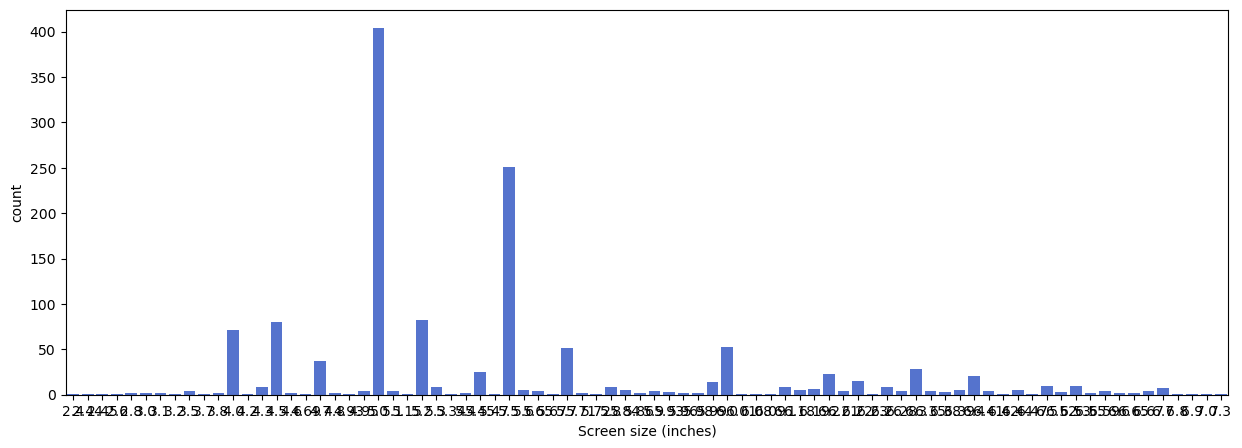

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['Screen size (inches)'], y=engine['count'], color='royalblue')

c:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

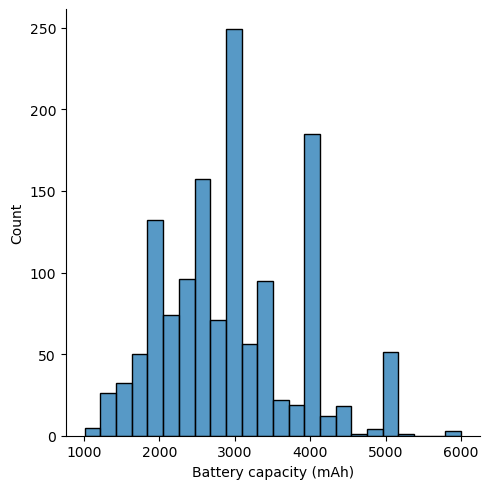

In [17]:
plt.figure(figsize=(15,5))
sns.displot(df['Battery capacity (mAh)'])

c:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

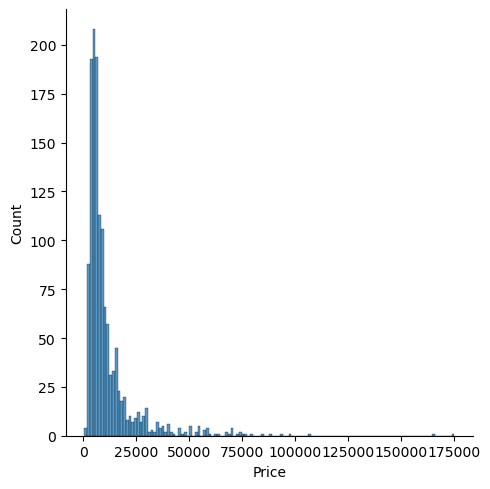

In [18]:
plt.figure(figsize=(15,5))
sns.displot(df['Price'])

In [19]:
features = ['Battery capacity (mAh)', 'Screen size (inches)', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Number of SIMs']
x = df[features]
y = df['Price']
x.shape, y.shape

((1359, 7), (1359,))

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=36)
y_test.shape

(340,)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [44]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.626861141184267


In [46]:
#Battery capacity (mAh):4015 Screen size (inches):6.7 Processor:8 RAM (MB):4 Internal storage (GB):120 Rear camera: 68 Number of SIMs:2
input_data = np.array([[4015, 6.7,8, 4,120, 68, 2]])

prediction = lr.predict(input_data)
print('Estimasi harga produk dalam IDR :', prediction)

Estimasi harga produk dalam IDR : [14399.51079522]


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
import pickle

filename = 'mobile_phone.sav'
pickle.dump(lr,open(filename,'wb'))